<a href="https://colab.research.google.com/github/ajit2001/codsoft_3/blob/main/Sales_Prediction%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

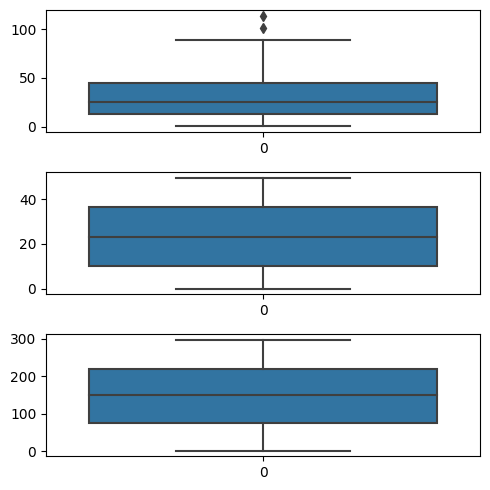

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig ,axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(df['Newspaper'],ax = axs[0])
plt2 = sns.boxplot(df["Radio"],ax = axs[1])
plt4 = sns.boxplot(df['TV'],ax = axs[2])
plt.tight_layout()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

<Axes: xlabel='TV', ylabel='Sales'>

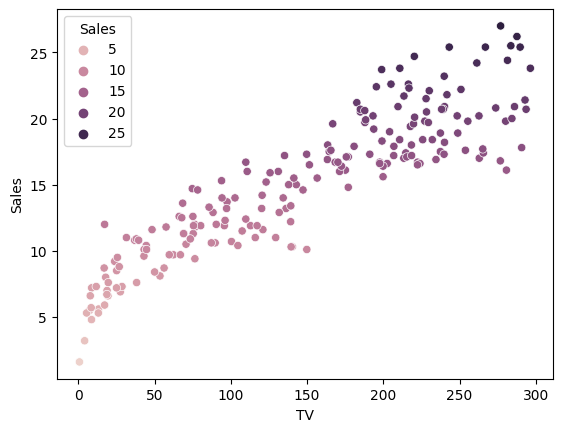

In [14]:
sns.scatterplot(df, x = df['TV'], y = df['Sales'], hue = df['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

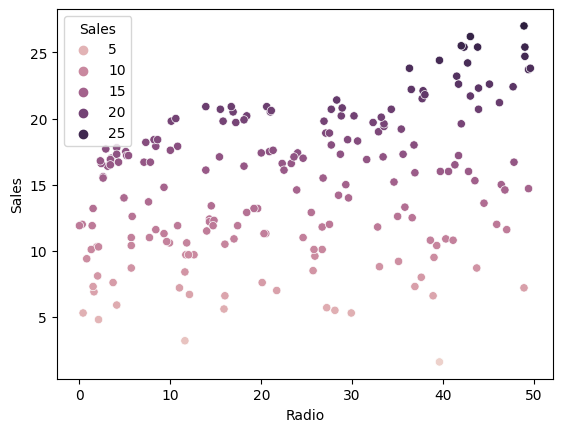

In [15]:
sns.scatterplot(df, x = df['Radio'], y = df['Sales'], hue = df['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

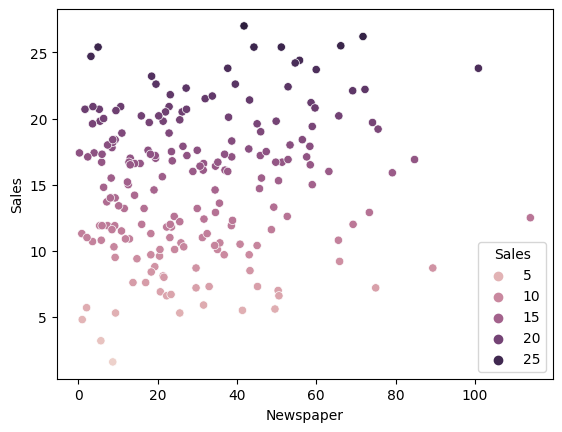

In [16]:
sns.scatterplot(df, x = df['Newspaper'], y = df['Sales'], hue = df['Sales'])

<Axes: >

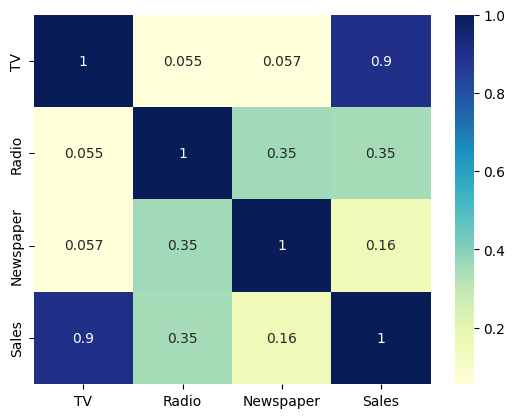

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [17]:
X = df.drop(['Sales'], axis = 1)
y = df['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [18]:
regressor1 = LinearRegression()

regressor1.fit(x_train, y_train)


LinearRegression()

In [19]:
y_pred1 = regressor1.predict(x_test)
df = pd.DataFrame({'Actual labels': y_test , "Predicted labels": y_pred1})
df

,Actual labels,Predicted labels
112,17.1,15.817942
29,10.5,10.150324
182,8.7,8.267378
199,18.4,18.255807
193,19.6,18.064664
85,20.2,17.243546
10,12.6,8.812945
54,20.2,22.045131
115,12.6,12.382082
35,17.8,21.036911


In [20]:
r2score = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
print("Linear Regression : ")
print(f"R2 score : {r2score}")
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")

Linear Regression : 
R2 score : 0.8407131803267819
Mean Absolute Error : 1.4005398146683294
Mean Squared Error : 3.091721330322738
